# Student Name: Qadeer Hussain

# Student ID: C00270632

# Topic: Convolutional Neural Networks (CNN)

# Last Modified: 19/03/2025

In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import cv2
from tensorflow import keras
import pandas as pd
import seaborn as sns
from tensorflow.keras import layers

# Load the dataset

Dataset link: https://www.kaggle.com/datasets/msambare/fer2013/data

In [21]:
# Dataset path
dataset_dir = "Facial-Expression-Dataset"

train_dir = os.path.join(dataset_dir, "train")
test_dir = os.path.join(dataset_dir, "test")

# Classes
categories = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

# Check the structure
for category in categories:
    path = os.path.join(train_dir, category)
    print(f"{category} has {len(os.listdir(path))} images.")

angry has 3995 images.
disgust has 436 images.
fear has 4097 images.
happy has 7215 images.
neutral has 4965 images.
sad has 4830 images.
surprise has 3171 images.


In [22]:
num_samples = 5

# Exploring the dataset

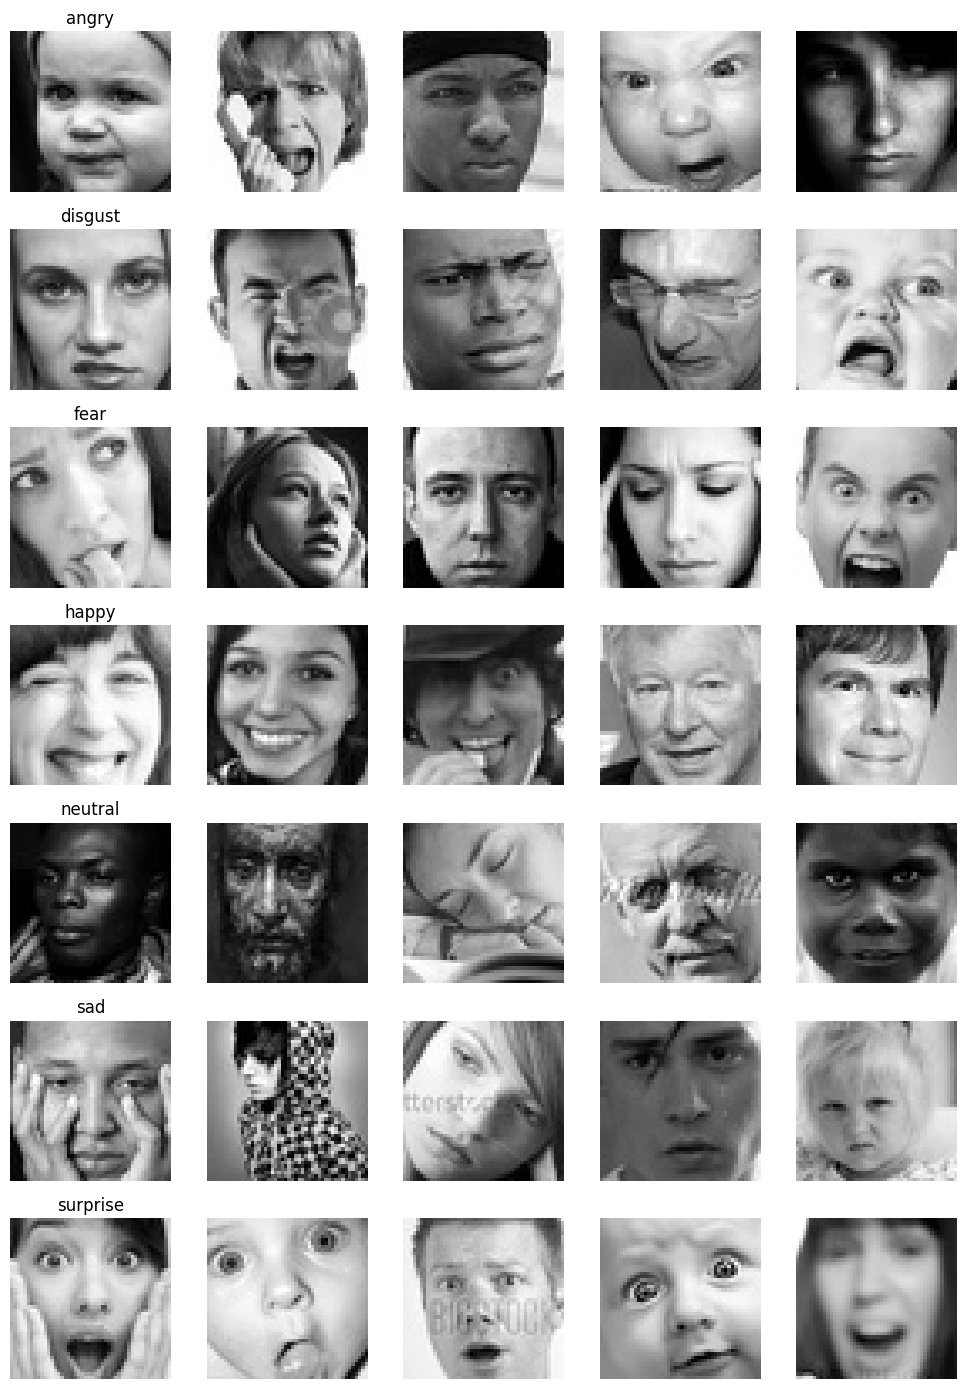

In [23]:
# Create figure
fig, axes = plt.subplots(len(categories), num_samples, figsize=(num_samples * 2, len(categories) * 2))

for i, category in enumerate(categories):
    category_path = os.path.join(train_dir, category)
    images = os.listdir(category_path)

    for j in range(num_samples):
        img_name = random.choice(images)
        img_path = os.path.join(category_path, img_name)

        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        axes[i, j].imshow(img, cmap='gray')
        axes[i, j].axis('off')

        if j == 0:
            axes[i, j].set_title(category, fontsize=12)

plt.tight_layout()
plt.show()

Category: fear
Image Shape: (48, 48)
Data Type: uint8


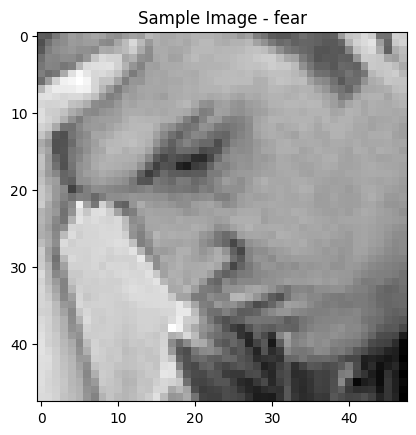

In [24]:
# Pick a random category(class) and image
random_category = random.choice(categories)
random_img_path = os.path.join(train_dir, random_category, random.choice(os.listdir(os.path.join(train_dir, random_category))))

# Load image
img = cv2.imread(random_img_path, cv2.IMREAD_GRAYSCALE)

# Print shape and data type
print(f"Category: {random_category}")
print(f"Image Shape: {img.shape}")
print(f"Data Type: {img.dtype}")

# Display image
plt.imshow(img, cmap="gray")
plt.title(f"Sample Image - {random_category}")
plt.show()

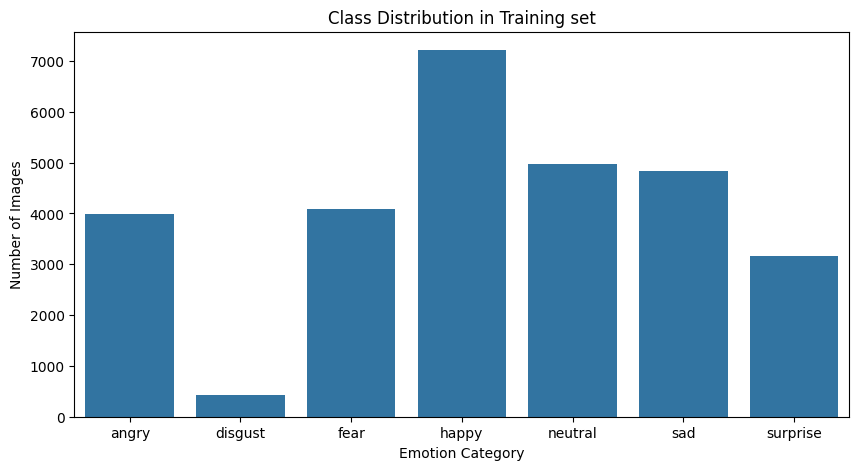

In [25]:
# Count images per category
category_counts = {category: len(os.listdir(os.path.join(train_dir, category))) for category in categories}

# DataFrame
df = pd.DataFrame(list(category_counts.items()), columns=["Category", "Num Images"])

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=df["Category"], y=df["Num Images"])
plt.xlabel("Emotion Category")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Training set")
plt.show()

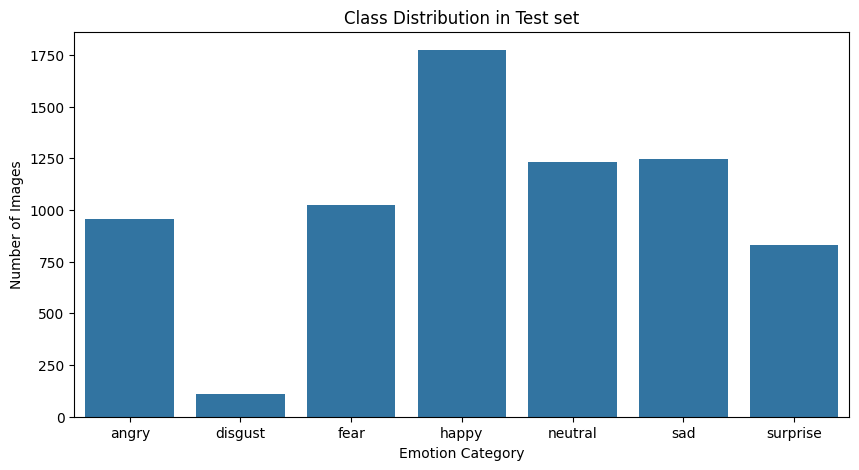

In [26]:
# Count images per category
category_counts = {category: len(os.listdir(os.path.join(test_dir, category))) for category in categories}

# DataFrame
df = pd.DataFrame(list(category_counts.items()), columns=["Category", "Num Images"])

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=df["Category"], y=df["Num Images"])
plt.xlabel("Emotion Category")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Test set")
plt.show()

# Data Preprocessing

In [27]:
IMG_SIZE = (48, 48)
BATCH_SIZE = 64

In [28]:
# Load datasets directly from the directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    shuffle=True,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    color_mode="grayscale"
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    shuffle=True,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    color_mode="grayscale"
)

Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


In [29]:
class_names = train_dataset.class_names
print("Class names:", class_names)

normalization_layer = tf.keras.layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))

Class names: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


# Data Augmentation

In [30]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),   
    layers.RandomZoom(0.1)
])

train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))

# Build the model

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(
    input_shape=(48, 48, 1),
    kernel_size=5, 
    filters=8, 
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2), 
    strides=(2, 2)
))

model.add(tf.keras.layers.Conv2D(
    kernel_size=5, 
    filters=16, 
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2), 
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128, 
    activation=tf.keras.activations.relu
))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=len(class_names),  
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

/var/data/python/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
# Model Summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 44, 44, 8)      │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 22, 22, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 18, 18, 16)     │         3,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 9, 9, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1296)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       166,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 170,343 (665.40 KB)

 Trainable params: 170,343 (665.40 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model

In [34]:
EPOCHS = 40

history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=EPOCHS
)

Epoch 1/40
449/449 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.2692 - loss: 1.7875 - val_accuracy: 0.3533 - val_loss: 1.6463
Epoch 2/40
449/449 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.3605 - loss: 1.6351 - val_accuracy: 0.4192 - val_loss: 1.5026
Epoch 3/40
449/449 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.4062 - loss: 1.5426 - val_accuracy: 0.4411 - val_loss: 1.4655
Epoch 4/40
449/449 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.4200 - loss: 1.5017 - val_accuracy: 0.4519 - val_loss: 1.4221
Epoch 5/40
449/449 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.4388 - loss: 1.4686 - val_accuracy: 0.4674 - val_loss: 1.3855
Epoch 6/40
449/449 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.4524 - loss: 1.4309 - val_accuracy: 0.4809 - val_loss: 1.3503
Epoch 7/40
449/449 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.4617 - loss: 1.4069 - val_accuracy: 0.4831 - val_loss: 1.3449
Epoch 8/40
449/449 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.4666 - loss: 1.3943 - val_accu

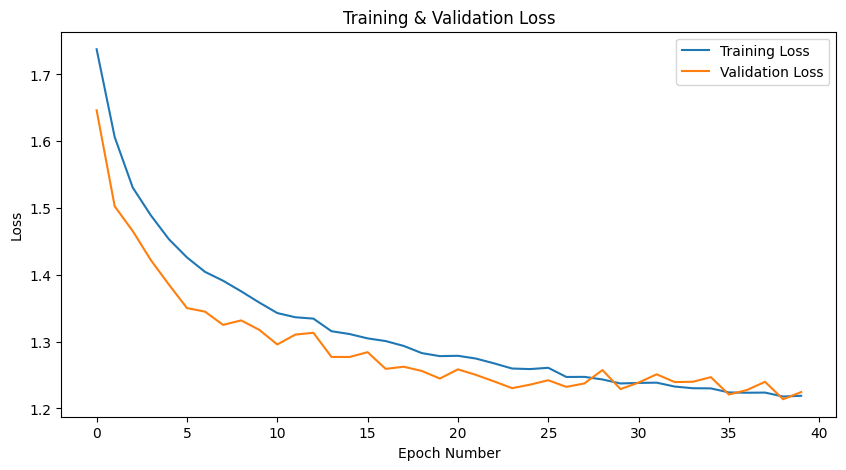

In [35]:
# Plot loss
plt.figure(figsize=(10, 5))
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training & Validation Loss')
plt.show()

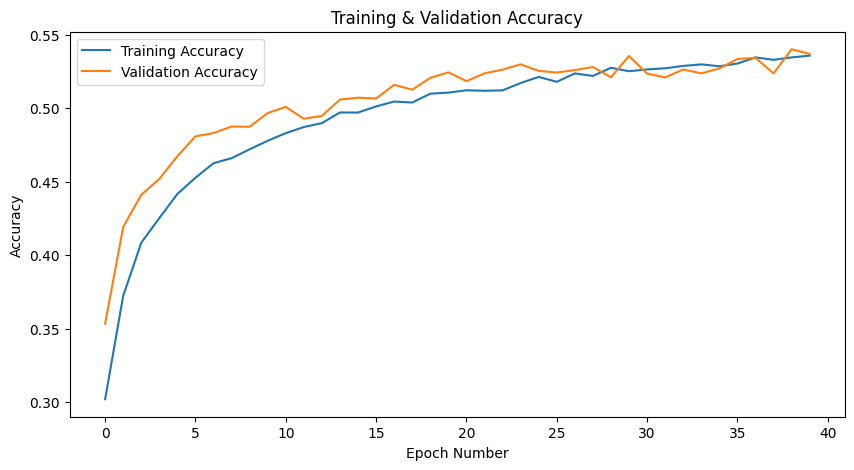

In [36]:
# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')
plt.show()

In [51]:
# Test set accuracy
training_loss, training_acc = model.evaluate(train_dataset)
print(f"Training Accuracy: {training_acc:.4f}")
print(f"Training Loss: {training_loss:.4f}")

449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5590 - loss: 1.1622
Training Accuracy: 0.5593
Training Loss: 1.1567


In [50]:
# Test set accuracy
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5410 - loss: 1.2241
Test Accuracy: 0.5371
Test Loss: 1.2246


# Test the model 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


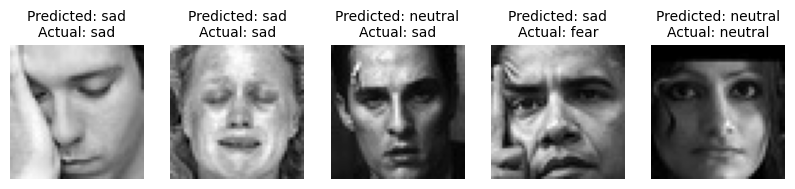

In [ ]:
test_images, test_labels = next(iter(test_dataset.take(1)))

# Make predictions
predictions = model.predict(test_images)

# Plot some images with their predicted labels
num_images = 5
plt.figure(figsize=(10, 5))

for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(test_images[i].numpy().squeeze(), cmap="gray")
    plt.axis("off")
    
    # Get predicted label
    predicted_label = np.argmax(predictions[i])
    actual_label = test_labels[i].numpy()
    
    plt.title(f"Predicted: {class_names[predicted_label]}\nActual: {class_names[actual_label]}", fontsize=10)

plt.show()

# Save the model

In [49]:
model.save("Facial_Expression_Prediction.h5")